# **Wheat Production and Global Pricing Dynamics**

**Authors**: Matthew Ocampo, Sam Sims, Judith Haryanto, Sant Sumetpong

## **Introduction**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import linear_model

Changes in food prices depend on changes in input costs. It’s not the only factor of course (i.e., climate, economic stability, changes in demand, changes in demand/supply of substitutes or complements, etc). As such, should there be changes in input costs, we would expect to see changes in food prices. The research question we’re interested in the temporal relationship between changes in input costs with changes in food prices with time progression. We will be investigating the relationship between oil prices wheat prices while controlling for other factors such as climate and the cost of other inputs like fertilizer and pesticides. The findings could contribute towards greater understanding of how food prices fluctuate based of off oil prices, specifically how much do changes in oil prices affect food prices. This will be useful in informing macroeconomic policies and international relations since not only are oil and wheat commodities in most – if not all – countries, but the price increase in these goods also tend to be act as inflationary pressure to the local economy.

For this project, our group proposes to examine the prices of inputs in agricultural activity and how the fluctuating prices affects the end cost of wheat.

This project will require combining and cleaning datasets, visualizing trends in data as well as mapping of sources of wheat, and input time lag with regression.

## Hypothesis

We hypothesize that oil prices may be more closely correlated with wheat prices than other inputs. This is due to numerous potential reasons:


i) Delayed information on price changes and subsequent changes in economic activities across the supply chain and across levels of production

ii) Farmers purchase oil at a set price through contracts on numerous occasions during the year, thus are incentivized to form purchase contracts when prices are low.

iii) The global wheat market, even though it is not concentrated, peak production happens when the Northern hemisphere experiences summer and fall. Therefore changes in oil prices may not impact wheat prices when production is low.

## Methodology

We decided to use US data for our analyses because not only are there a lot of datasets being publicly available, but also because US is one of the largest global producers and exporters of wheat. Our analyses is restricted to monthly data from January 1990 to February 2024, just after massive technological changes and large scale farming become increasingly adopted starting from 1970s. Monthly wheat prices, oil prices (West Texas Intermediary pricing), seed prices, machinery prices, are obtained from the Federal Reserve Economic Data (FRED). Climate data (i.e., monthly precipitation) were obtained from the National Oceanic and Atmospheric Administration (NOAA). Information on US minimum wage and wages of farm labourers were obtained from the US Department of Agriculture (USDA) and the US Bureau of Labour Statistics.

We then plotted numerous variables alongside one another to visualized how the movements of one variable changes relative to another - supplementing these graphs with correlation coefficients to see how two variables are closely correlated to one another.

Finally, we will regress oil prices as our treatment variable, other inputs as controlled variables, versus wheat prices as the outcome variable to form a time-series regression model. Oil prices will be lagged behind wheat prices using various time lags to check whether there's greater fit.

## The Data

PCU325311325311-4.csv is Producer Price Index by Industry: Nitrogenous Fertilizer Manufacturing: Urea (DISCONTINUED)

WTISPLC is the price of oil by West Texas Intermediary

WPUSI024011 is the Producer Price Index by Commodity: Special Indexes: Agricultural Machinery, Including Tractors

PWHEAMTUSDM is the Global price of Wheat

farm_wage_data_99t22 is the farm wage data from USDA.

Pesticide2003 is pesticade data from 2003.

PCU3253203253201 is pesticide data from Producer Price Index by Industry: Pesticide and Other Agricultural Chemical Manufacturing: Agricultural and Commercial Pesticides and Chemicals FRED

seeds is seed prices 

weather data from NOAA

wheat production

## **Analysis**

We begin with a pie chart depicting resource use in the production of wheat.

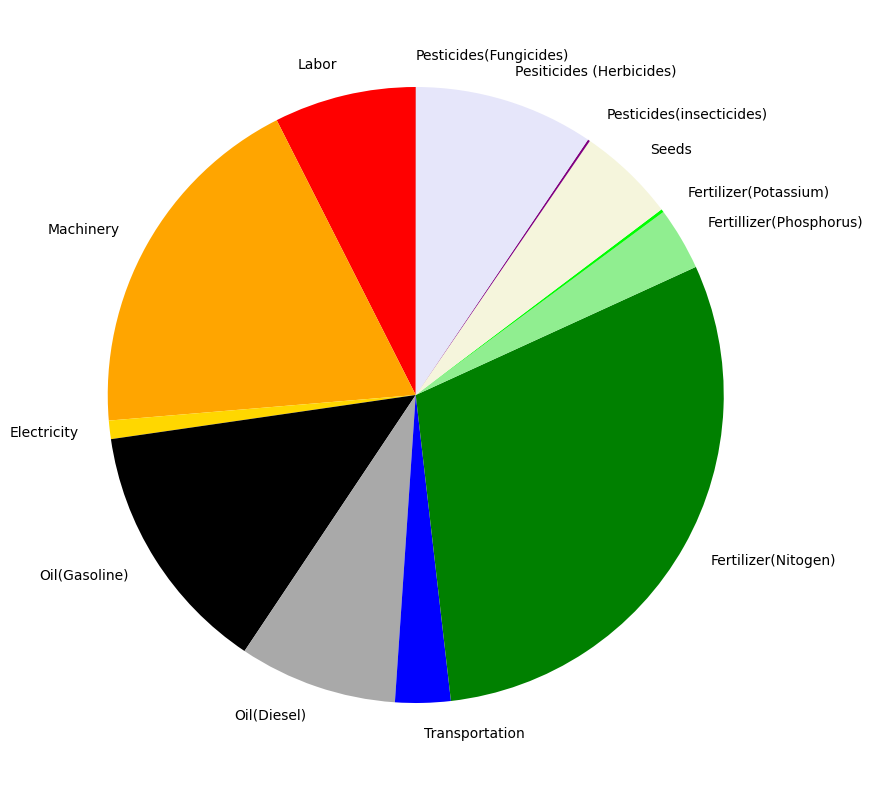

In [2]:
plt.rcParams["figure.figsize"] = [25, 10]

y = np.array([316000, 800000, 41000, 565000, 352000, 123000, 1272000, 140000, 7000, 218000, 5000, 400000, 400, ])
mylabels = ['Labor', 'Machinery', 'Electricity','Oil(Gasoline)', 'Oil(Diesel)','Transportation', 'Fertilizer(Nitogen)', 'Fertillizer(Phosphorus)','Fertilizer(Potassium)','Seeds','Pesticides(insecticides)', 'Pesiticides (Herbicides)','Pesticides(Fungicides)']
mycolors = ["red", "orange", 'gold', 'black','darkgrey','blue','green','lightgreen','lime','beige','purple','lavender', 'brown' ]

plt.pie(y, labels = mylabels, startangle = 90, colors=mycolors)
plt.show() 

The data from the pie chart comes from Amenumey, S.E., Capel, P.D. Fertilizer Consumption and Energy Input for 16 Crops in the United States.Nat Resour Res 23, 299–309 (2014) who referenced Pimentel, D. (2006). Impacts of organic farming on the efficiency of energy use in agriculture. Washington, DC: The Organic Center 40 p. 

The input chart represents the importance of each input into the production of wheat. It is unsurprising that the three largest inputs into wheat production, making up 73.8% of the total, include Fertilizers (33.3%), Oil (21.6%) and Machinery (18.9%). 

This influence our decision to not correlate our wheat data with inputs like electricity, labour and transportation and focus more heavily on inputs that had larger and more globally orientated data sets.

## Visualizations

We continue by creating visualizations that deomstrate relationships between input prices and wheat prices. We consider the following inputs and their prices: oil, fertilizer, agricultural machinery, pesticides and seeds for planting. We hoped these line plots would serve as early indicators of which input prices were highly correlated with wheat prices. We examine US prices for all inputs, with oil data being taken from the West Texas Intermediary. 

In [3]:
df1 = pd.read_csv('WTISPLC.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df1 = pd.merge(df1, df2)

merged_df1['DATE'] = pd.to_datetime(merged_df1['DATE'])
merged_df1 = merged_df1.set_index('DATE')

merged_df1.rename(columns={'WTISPLC': 'WTI', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df1.head()

FileNotFoundError: [Errno 2] No such file or directory: 'WTISPLC.csv'

In [ ]:
x = merged_df1.index
y1 = merged_df1['WTI']
y2 = merged_df1['WHEAT (USD)']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='black', label='West Texas Intermediate')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Oil Price per barrel', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = '#DAA520', label='Global Wheat Price')  # the data was collected by the International Montetary Fund
ax2.set_ylabel('Wheat Prices per metric ton', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [ ]:
df1 = pd.read_csv('PCU325311325311.csv')
df2 = pd.read_csv('WTISPLC.csv')

merged_df2 = pd.merge(df1, df2)
merged_df2.rename(columns={'PCU325311325311': 'FERT', 'WTISPLC': 'WTI'}, inplace=True)
merged_df2.head()

In [ ]:
x = merged_df2.index
y1 = merged_df2['FERT']
y2 = merged_df2['WTI']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='black', label='WTI Prices')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Oil Price', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = 'lightgreen', label='Nitrogenous Fertilizer Prices (USD)') 
ax2.set_ylabel('Nitrogenous Fertilizer Prices', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [ ]:
df1 = pd.read_csv('WPUSI024011.csv')
df2 = pd.read_csv('WTISPLC.csv')

merged_df3 = pd.merge(df1, df2)

merged_df3['DATE'] = pd.to_datetime(merged_df3['DATE'])
merged_df3 = merged_df3.set_index('DATE')

merged_df3.rename(columns={'WPUSI024011': 'AGRI MACH', 'WTISPLC': 'WTI'}, inplace=True)
merged_df3.head()

In [ ]:
x = merged_df3.index
y1 = merged_df3['AGRI MACH']
y2 = merged_df3['WTI']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='orange', label='Agricultural Machinery Price')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Agricultural Machinery, including Tractors', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = 'black', label='Oil Prices')  # the data was collected by the International Montetary Fund
ax2.set_ylabel('Oil Prices in barrels', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [ ]:
df1 = pd.read_csv('PCU325311325311.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')
merged_df4 = pd.merge(df1, df2)

merged_df4['DATE'] = pd.to_datetime(merged_df4['DATE'])
merged_df4 = merged_df4.set_index('DATE')

merged_df4.rename(columns={'PCU325311325311': 'FERT', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df4.head()

In [ ]:
x = merged_df4.index
y1 = merged_df4['FERT']
y2 = merged_df4['WHEAT (USD)']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='#DAA520', label='Global Wheat Prices')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Global Wheat Price', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = 'darkgreen', label='Nitrogenous Fertilizer Prices (USD)') 
ax2.set_ylabel('Nitrogenous Fertilizer Prices', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [ ]:
df1 = pd.read_csv('WPUSI024011.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df5 = pd.merge(df1, df2)

merged_df5['DATE'] = pd.to_datetime(merged_df5['DATE'])
merged_df5 = merged_df5.set_index('DATE')

merged_df5.rename(columns={'WPUSI024011': 'AGRI MACH', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df5.head()

In [ ]:
x = merged_df5.index
y1 = merged_df5['AGRI MACH']
y2 = merged_df5['WHEAT (USD)']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='Grey', label='Agricultural Machinery Price')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Agricultural Machinery, including Tractors', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = '#DAA520', label='Global Wheat Price')  # the data was collected by the International Montetary Fund
ax2.set_ylabel('Wheat Prices per metric ton', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [ ]:
df1 = pd.read_csv('Pesticide2003.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df6 = pd.merge(df1, df2)

merged_df6['DATE'] = pd.to_datetime(merged_df6['DATE'])
merged_df6 = merged_df6.set_index('DATE')

merged_df6.rename(columns={'PCU3253203253201': 'PEST', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df6.head()

NameError: name 'merged_df6' is not defined

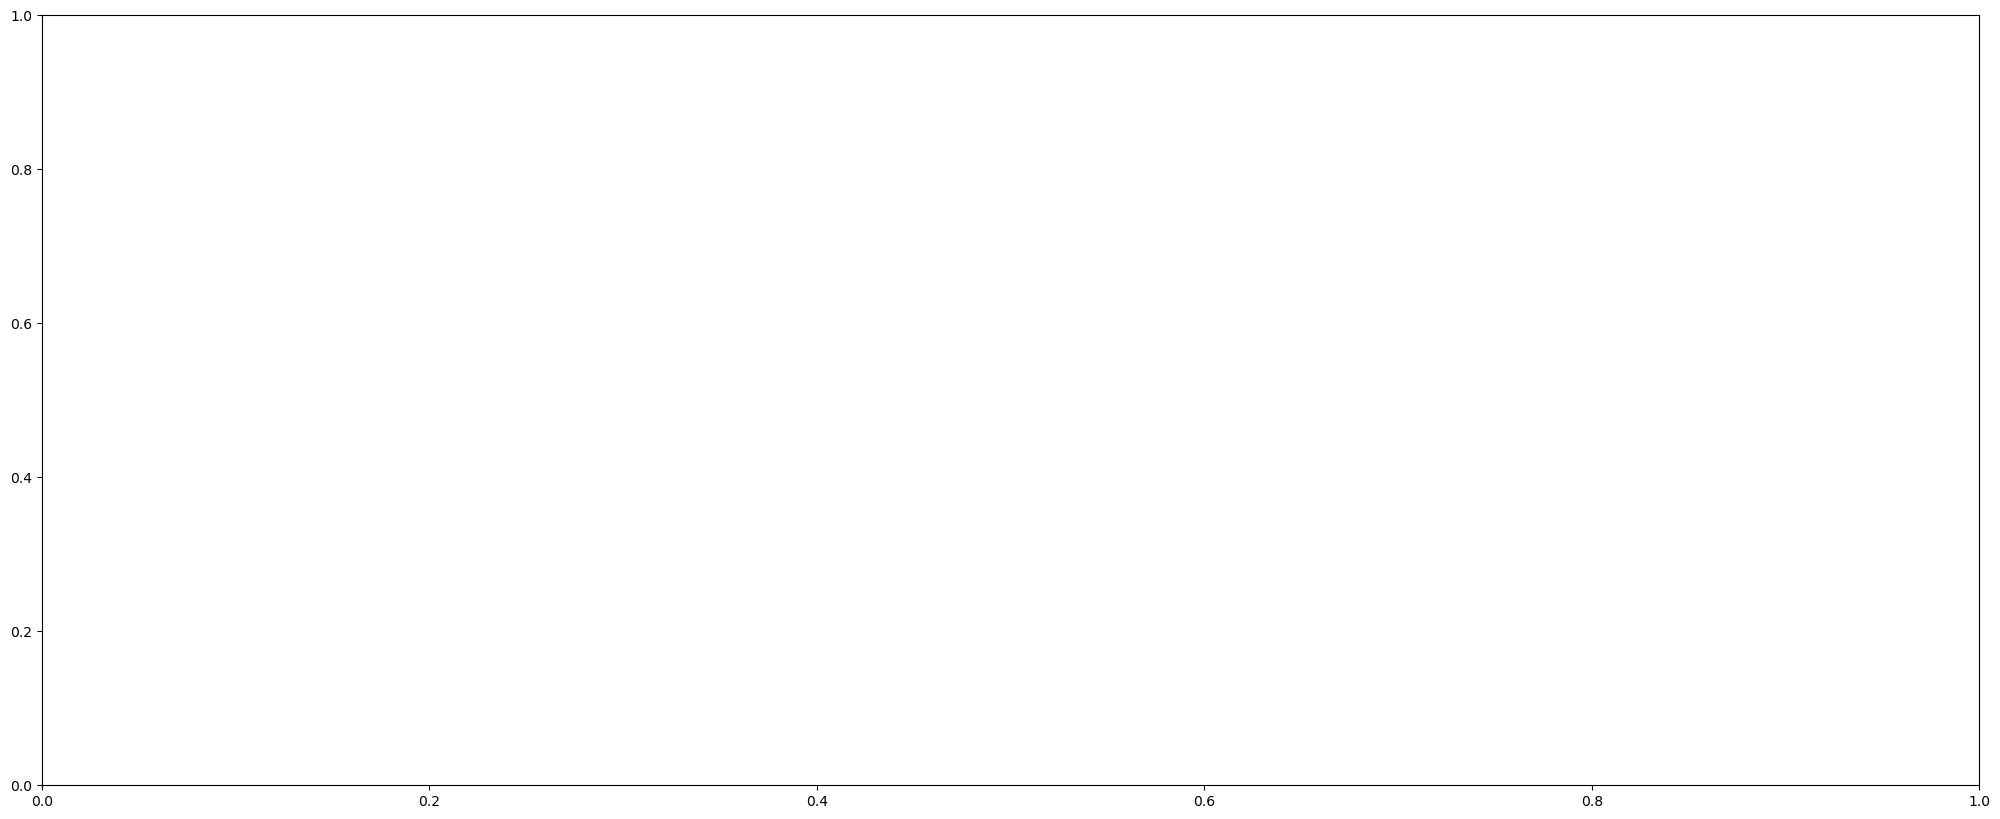

In [4]:
fig, ax1 = plt.subplots()

# use the 'Year' column as the x-axis values
x = merged_df6.index 
y1 = merged_df6['PEST']
y2 = merged_df6['WHEAT (USD)']

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'brown', label='Price of Pesticide (USD)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price of Pesticide (USD)', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, 'gold', label='Price of Wheat (USD)') # The data was collected by the International Monetary Fund
ax2.set_ylabel('Price of Wheat (USD)', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()

plt.show()


In [ ]:
price = pd.read_csv('PWHEAMTUSDM.csv')  # WHEAT
seeds_0 = pd.read_csv('seeds.csv')  # seeds

test = pd.merge(price, seeds_0)

lags = range(1, 13)  # just two lags for demonstration.

lagged_df = test.assign(**{f'seed_price (t-{lag})': test['WPU02550304'].shift(-lag) for lag in lags})
lagged_df = lagged_df.rename(columns={"WPU02550304": "seed_price (t)", "PWHEAMTUSDM": "wheat_price"})
lagged_df

In [ ]:
y_lag = lagged_df.wheat_price  # target
col_names = lagged_df.columns.values.tolist()
col_names.remove('DATE')
col_names.remove('wheat_price')
X_lag = lagged_df[col_names]

# run correlations
# for each in col_names, run a correlation with wheat prices

corr_lag = {}
for i, e in enumerate(X_lag):
    corr_lag['t+'+ str(i)] = lagged_df["wheat_price"].corr(lagged_df[e])
    print(f"When lagged by {i} months, the correlation between wheat prices and seed prices is {corr_lag['t+'+str(i)]}.")

In [5]:
lagged_df_12 = test.assign(**{f'seed_price (t-{12})': test['WPU02550304'].shift(-12)})
lagged_df_12 = lagged_df.rename(columns={"WPU02550304": "seed_price (t)", "PWHEAMTUSDM": "wheat_price"})
lagged_df_12.head()

NameError: name 'test' is not defined

NameError: name 'lagged_df_12' is not defined

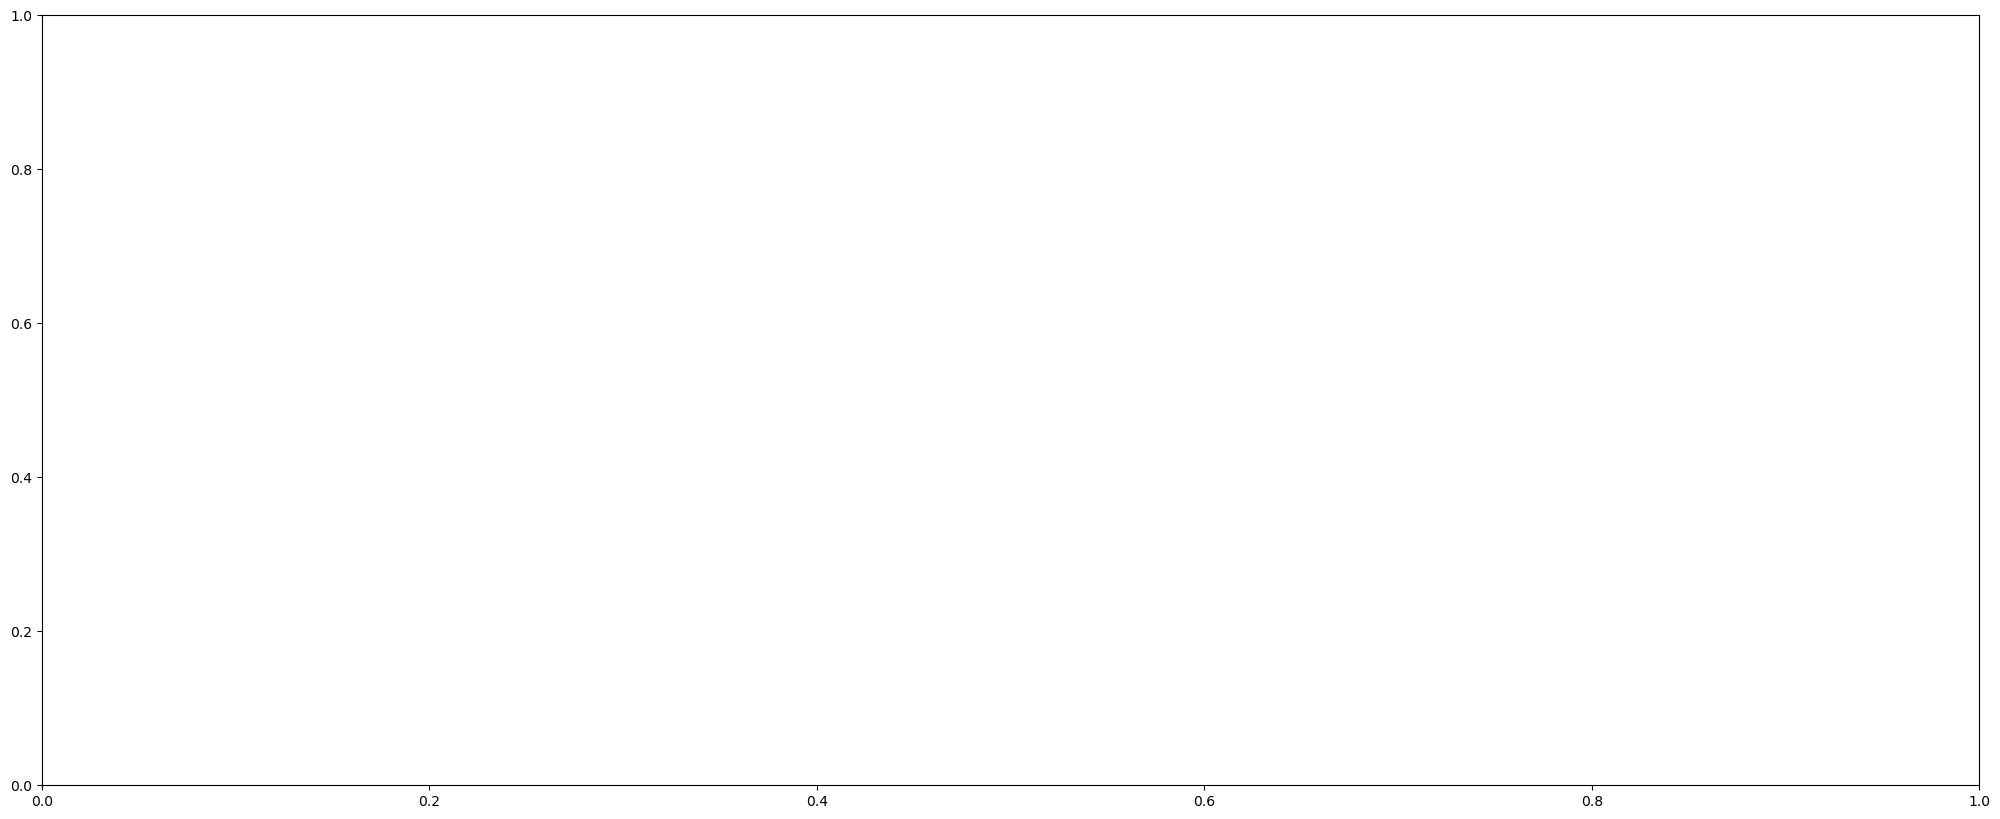

In [6]:
fig, ax1 = plt.subplots()

# use the 'Year' column as the x-axis values
x = lagged_df_12.index 
y1 = lagged_df_12['seed_price (t-12)']
y2 = lagged_df_12['wheat_price']

ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'brown', label='Seed Price Lagged by 12 Months')
ax1.set_xlabel('Year')
ax1.set_ylabel('Seed Price Lagged by 12 Months', color='black')

ax2.plot(x, y2, 'gold', label='Wheat Price')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wheat Price', color='black')

# display legend for y-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()

plt.show()

In [ ]:
pcpt_raw = pd.read_csv("weather data.csv")
wprod_raw = pd.read_csv("wheat production.csv")

# remove unecesary columns
wprod = wprod_raw.drop(wprod_raw.columns[list(range(6, 13))], axis = 1)

# remove rows 243 to 249 for production data
wprod = wprod.drop(list(range(243, 250)))

# remove 2024 data for weather data
pcpt_raw = pcpt_raw.drop(list(range(408, 410)))

# assign column names
wprod.columns = ['Year', 'Quarter', 'Beginning stocks', 'Production', 'Imports', 'Total supply']

# drop empty rows to get yearly production data
test = wprod.dropna(subset = ['Year','Production'])
test = test.reset_index(drop = True)
y1 = list(map(str, list(range(1975, 2024))))
y2 = list(map(str, list(range(1976, 2025))))
test.loc[:, 'Year'] = [u+'/'+i for u, i in zip(y1, y2)]

# remove years before 1990 (so first entry is now 1990/1991)
test_red = test.drop(list(range(0, 15))).reset_index(drop=True)

# now merge yearly precipitation with yearly production
year = list(range(1990, 2024))  # length is 34

pcpt_year = pcpt_raw.groupby(np.arange(len(pcpt_raw))//12).mean()

df = pd.DataFrame([year, test_red['Production'], pcpt_year['Value']]).T
df.columns = ['Year', 'Production', 'Precipitation']
df = df.set_index('Year')
df["Production"] = df["Production"].str.replace(",","").astype(float)
df["Precipitation"] = df["Precipitation"].astype(float)

df.head()

In [ ]:
x = df.index
y1 = df['Production']
y2 = df['Precipitation']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='limegreen', label='Production (Millons of Bushels)')
ax2.plot(x, y2, color = 'c', label='Precipitation (mm)')  # the data was collected by the International Montetary Fund

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

## Correlation Coefficients

We proceed to calculate correlation coefficients between prices to pinpoint the most significant determinants of wheat prices.

In [7]:
Wheat_Oil_Corr = merged_df1["WTI"].corr(merged_df1["WHEAT (USD)"])
Fertilizer_Oil_Corr = merged_df2["WTI"].corr(merged_df2["FERT"])
AgMech_Oil_Corr = merged_df3["WTI"].corr(merged_df3["AGRI MACH"])
Fert_Wheat_Corr = merged_df4["FERT"].corr(merged_df4["WHEAT (USD)"])
AgMech_Wheat_Corr = merged_df5["AGRI MACH"].corr(merged_df5["WHEAT (USD)"])
Pesticide_Wheat_Corr = merged_df6["PEST"].corr(merged_df6["WHEAT (USD)"])
Seed_Wheat_Corr = lagged_df_12['seed_price (t-12)'].corr(lagged_df_12['wheat_price'])
WheatProd_Precip_Corr = df['Production'].corr(df['Precipitation'])

Wheat_Oil_Corr, Fertilizer_Oil_Corr, AgMech_Oil_Corr, Fert_Wheat_Corr, AgMech_Wheat_Corr, Pesticide_Wheat_Corr, Seed_Wheat_Corr, WheatProd_Precip_Corr

NameError: name 'merged_df1' is not defined

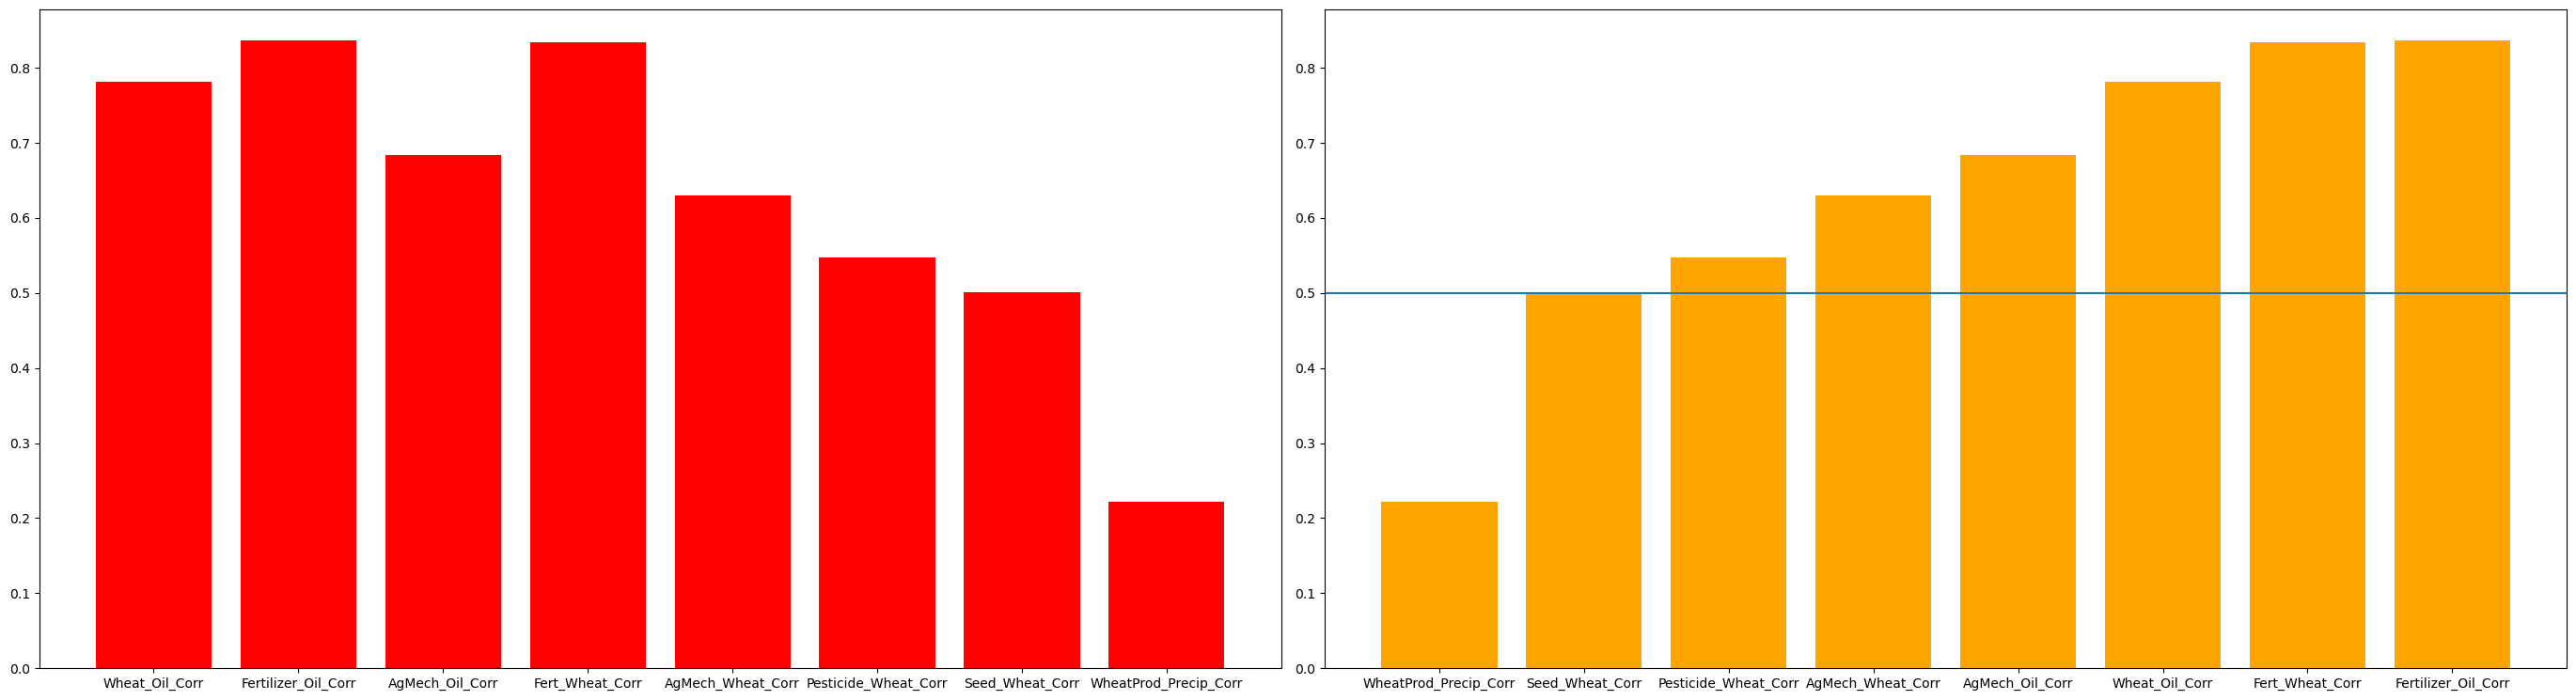

In [8]:
plt.rcParams["figure.figsize"] = [27.50, 7.55]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(
   dict(
      names=["Wheat_Oil_Corr", "Fertilizer_Oil_Corr", "AgMech_Oil_Corr", "Fert_Wheat_Corr", "AgMech_Wheat_Corr", "Pesticide_Wheat_Corr", "Seed_Wheat_Corr", "WheatProd_Precip_Corr"],
      marks=[0.7816870663891703, 0.8361374552246091, 0.6840589469388291, 0.8338631173271533, 0.6294197632618082, 0.5474396510682035, 0.5013909035767172, 0.2212097443743315 ])
)

plt.subplot(121)
plt.bar('names', 'marks', data=df, color='red')

plt.subplot(122)
df_sorted = df.sort_values('marks')
plt.bar('names', 'marks', data=df_sorted, color='orange')

plt.axhline(y=0.5)

plt.show()

The most surprising result of the graphs was the weak correlations of pesticides, seeds and the impact of precipitations on wheat production. The pesticide correlation can be attributed to the fact that wheat represents a fraction of the total use of pesticides in modern agriculture. Seed prices do not necessarily accurately reflect current or future prices of wheat due to the international variety of wheat seed types, as the seeds are often regionally specific to accommodate for soil types. Finally, the impact of precipitation on wheat production, which included lagging by up to 3 years, actually made the correlation worse. While this data is  regionally specific to the United States, it suggests the strong impact of irrigation efforts in mitigating the variation of rainfall for wheat production in the United States. 